In [ ]:
!wget https://github.com/ChanCheeKean/datasets/blob/main/images/basic_cv.zip?raw=true
!unzip -qq basic_cv.zip?raw=true

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [10]:
"""function"""

def show_pic(img):
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

# 1) Image Input and Output

## 1.1 Image Reading

(1300, 1950, 3)


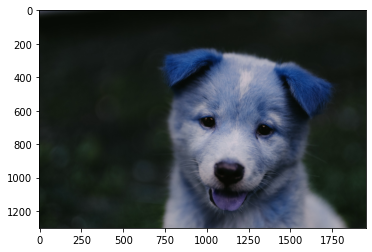

In [11]:
img = cv2.imread('./basic_cv/00-puppy.jpg')
# cv converted img to numpy
print(img.shape)
plt.imshow(img)

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR. Matplotlib's plot expects an RGB image, it is necessary to swap those channels. 

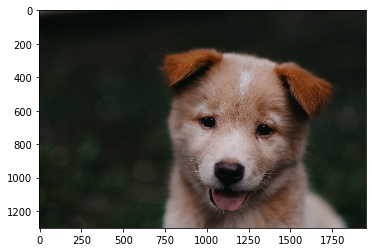

In [ ]:
# to convert color
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

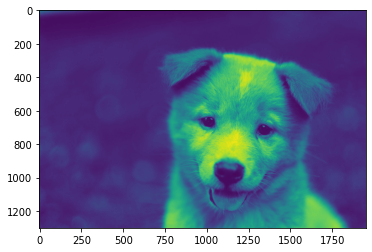

In [12]:
# Open at greyscale
img_gray = cv2.imread('./basic_cv/00-puppy.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

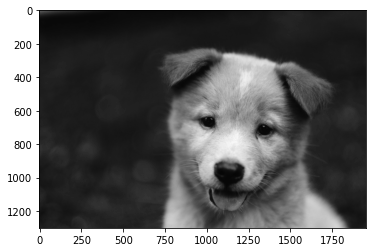

In [13]:
img_gray = cv2.imread('./basic_cv/00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap='gray')

In [15]:
# OpenCV can open images in separate outside windows when you run a .py script.
img = cv2.imread('./basic_cv/00-puppy.jpg', cv2.IMREAD_GRAYSCALE)
# Show the image with OpenCV
cv2.imshow('window_name', img)
# Wait for something on keyboard to be pressed to close window.
cv2.waitKey()

## 1.2 Image Saving

In [16]:
# Saving Image
print(type(img_gray))
cv2.imwrite('./basic_cv/saved_image.jpg',img_gray)

<class 'numpy.ndarray'>


True

## 1.3 Resizing

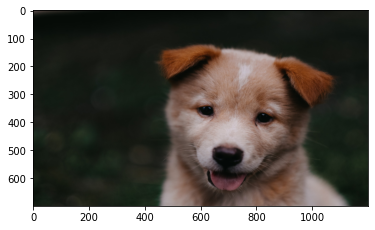

In [17]:
# Resizing
img = cv2.imread('./basic_cv/00-puppy.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_px = cv2.resize(img_rgb,(1200,700))
plt.imshow(img_px)

## 1.4 Flipping

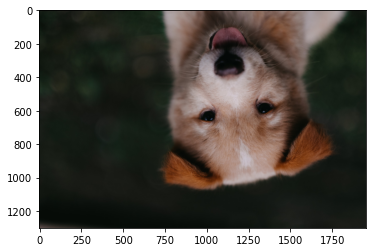

In [18]:
# FLip Along central x axis
img = cv2.imread('./basic_cv/00-puppy.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

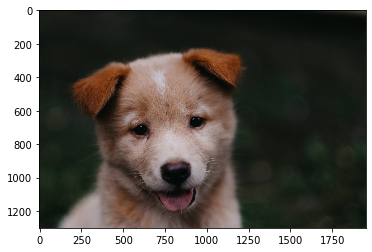

In [ ]:
# Along central y axis
new_img = cv2.flip(img_rgb,1)
plt.imshow(new_img)

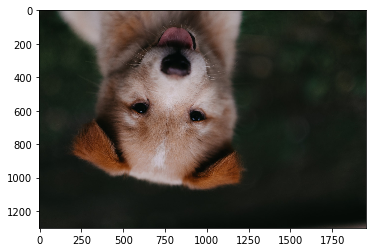

In [ ]:
# Along both axis
new_img = cv2.flip(img_rgb,-1)
plt.imshow(new_img)

# 2) Drawing Image

## 2.1 Shapes

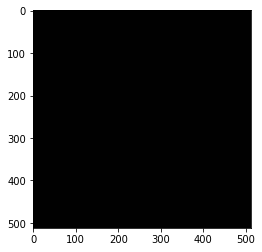

In [ ]:
# create blank image, all zero
blank_img = np.ones(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

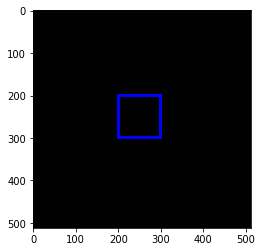

In [ ]:
# rectangle
# pt1 = top left, pt2 = bottom right
cv2.rectangle(blank_img,pt1=(200,200),pt2=(300,300),color=(0,0,255),thickness=5)
plt.imshow(blank_img)

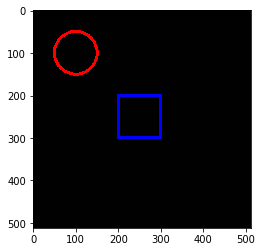

In [ ]:
# circle
cv2.circle(img=blank_img, center=(100,100), radius=50, color=(255,0,0), thickness=5)
plt.imshow(blank_img)

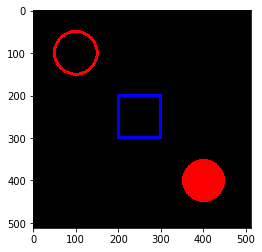

In [ ]:
# filled circle
cv2.circle(img=blank_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)
plt.imshow(blank_img)

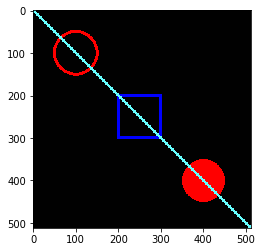

In [ ]:
# line
cv2.line(blank_img,pt1=(0,0),pt2=(511,511),color=(102, 255, 255),thickness=5)
plt.imshow(blank_img)

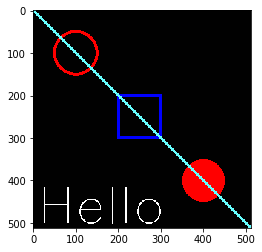

In [ ]:
# font
# org is the coordinate of bottom left
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,text='Hello',org=(10,500), fontFace=font,fontScale= 4,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(blank_img)

To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32.

In [ ]:
# polygons
blank_img = np.ones(shape=(512,512,3),dtype=np.int16)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],np.int32)
pts = vertices.reshape((-1,1,2))

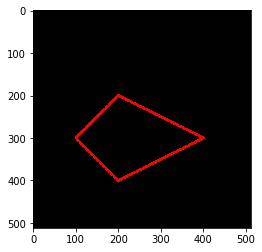

In [ ]:
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)

## 2.2 Direct Drawing On Mouse

In [ ]:
import cv2
import numpy as np

# Create a function based on a CV2 Event (Left button click)
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # left click green circle
        cv2.circle(img,(x,y),100,(0,255,0),-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        # right click red circle
        cv2.circle(img,(x,y),100,(0,0,255),-1)
        
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# This names the window so we can reference it 
cv2.namedWindow(winname='my_drawing')
# Connects the mouse button to our callback function
cv2.setMouseCallback('my_drawing',draw_circle)

while True: #Runs forever until we break with Esc key on keyboard
    # Shows the image window
    cv2.imshow('my_drawing',img)
    # EXPLANATION FOR THIS LINE OF CODE:
    # https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163
    if cv2.waitKey(20) & 0xFF == 27:
        break
# Once script is done, its usually good practice to call this line
# It closes all windows (just in case you have multiple windows called)
cv2.destroyAllWindows()

In [ ]:
# mouse dragging to draw rectangle
import cv2
import numpy as np

# Create a function based on a CV2 Event (Left button click)
drawing = False # True if mouse is pressed
ix,iy = -1,-1

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        # When you click DOWN with left mouse button drawing is set to True
        drawing = True
        # Then we take note of where that mouse was located
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        # Now the mouse is moving
        if drawing == True:
            # If drawing is True, it means you've already clicked on the left mouse button
            # We draw a rectangle from the previous position to the x,y where the mouse is
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
           
    elif event == cv2.EVENT_LBUTTONUP:
        # Once you lift the mouse button, drawing is False
        drawing = False
        # we complete the rectangle.
        cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# This names the window so we can reference it 
cv2.namedWindow(winname='my_drawing')
# Connects the mouse button to our callback function
cv2.setMouseCallback('my_drawing',draw_rectangle)

while True: #Runs forever until we break with Esc key on keyboard
    # Shows the image window
    cv2.imshow('my_drawing',img)
    # EXPLANATION FOR THIS LINE OF CODE:
    # https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163
    
    # CHECK TO SEE IF ESC WAS PRESSED ON KEYBOARD
    if cv2.waitKey(1) & 0xFF == 27:
        break
# Once script is done, its usually good practice to call this line
# It closes all windows (just in case you have multiple windows called)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
# Create a function based on a CV2 Event (Left button click)
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),100,(0,0,255),10)

# Open Image
img = cv2.imread("./DATA/dog_backpack.png")
# This names the window so we can reference it 
cv2.namedWindow(winname='dog')
# resized window
cv2.resizeWindow('dog', 200,600)
# Connects the mouse button to our callback function
cv2.setMouseCallback('dog',draw_circle)

while True: #Runs forever until we break with Esc key on keyboard
    # Shows the image window
    cv2.imshow('dog',img)
    # EXPLANATION FOR THIS LINE OF CODE:
    # https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163
    if cv2.waitKey(20) & 0xFF == 27:
        break
# Once script is done, its usually good practice to call this line
# It closes all windows (just in case you have multiple windows called)
cv2.destroyAllWindows()

# 3) Image Processing

## 3.1 Blending Image

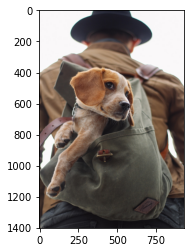

In [19]:
# Two images
img1 = cv2.imread('./basic_cv/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

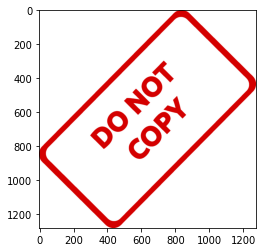

In [20]:
img2 = cv2.imread('./basic_cv/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

$$img1 * \alpha  + img2 * \beta  + \gamma $$

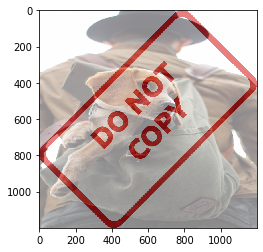

In [ ]:
# to ensure same size
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))
# add weightage
blended = cv2.addWeighted(src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=2)
plt.imshow(blended)

## 3.2 Blending Images of Different Sizes

In [21]:
# Load two images
img1 = cv2.imread('./basic_cv/dog_backpack.png')
img2 = cv2.imread('./basic_cv/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [22]:
img1.shape[1]

934

In [23]:
img2.shape

(600, 600, 3)

(600, 600, 3)


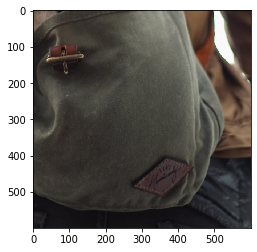

In [ ]:
rows_1,cols_1,channels_1 = img1.shape
rows_2,cols_2,channels_2 = img2.shape

roi = img1[(rows_1-rows_2) : (rows_1), (cols_1-cols_2) : (cols_1)] # BOTTOM RIGHT CORNER
print(roi.shape)
plt.imshow(roi)

(600, 600, 3)
(600, 600)


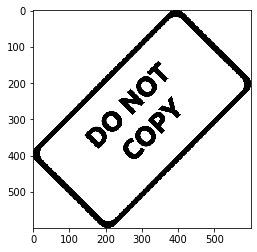

In [ ]:
# create mask, transparent background
# convert to black and white
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print(img2.shape)
print(img2gray.shape)
plt.imshow(img2gray,cmap='gray')

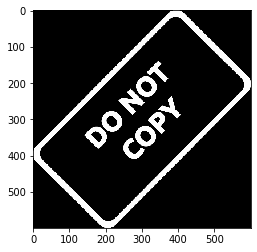

In [ ]:
# inverse black to white
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

(600, 600, 3)


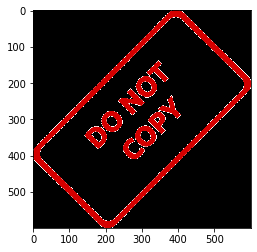

In [ ]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
print(fg.shape)
plt.imshow(fg)

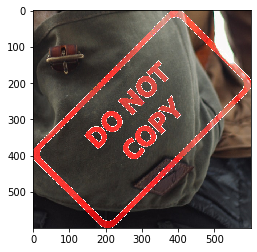

In [ ]:
# blend together
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

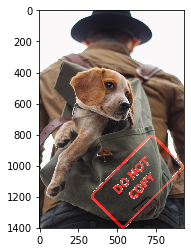

In [ ]:
# add to the original image
img1[(rows_1-rows_2) : (rows_1), (cols_1-cols_2) : (cols_1)] = final_roi
plt.imshow(img1)

## 3.3 Image Thresholding

### 3.3.1 Basic

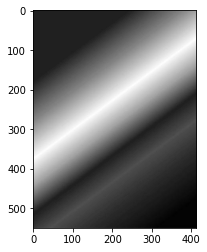

In [24]:
img = cv2.imread('./basic_cv/rainbow.jpg', 0)
plt.imshow(img,cmap='gray')

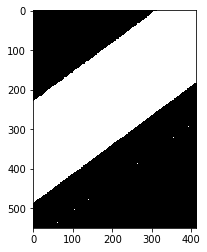

In [ ]:
# binary, lower than 255/2 is considered as black(0) else white (255)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

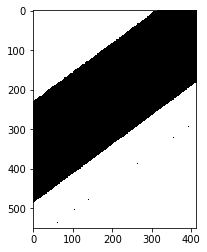

In [ ]:
# binary inverse
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

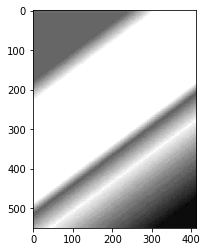

In [ ]:
# set to 255 if higher than threshold, else retain
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

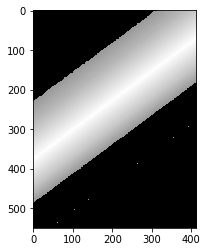

In [ ]:
# Threshold to Zero, set to 0 if lower than threshold
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

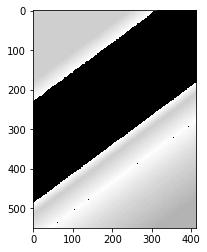

In [ ]:
# Threshold to Zero inverse
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

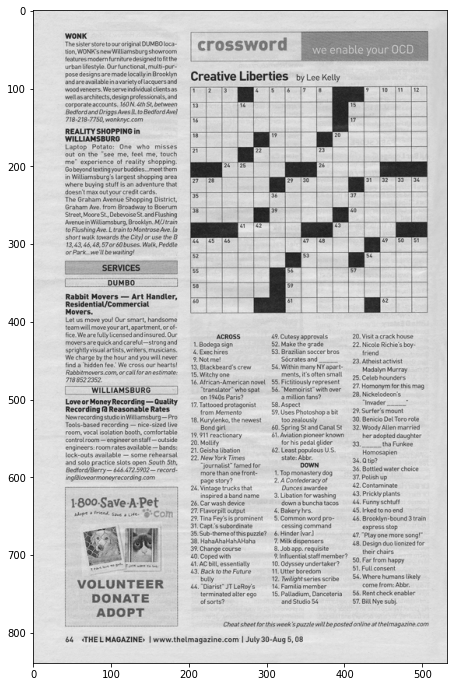

In [26]:
img = cv2.imread("./basic_cv/crossword.jpg",0)
show_pic(img)

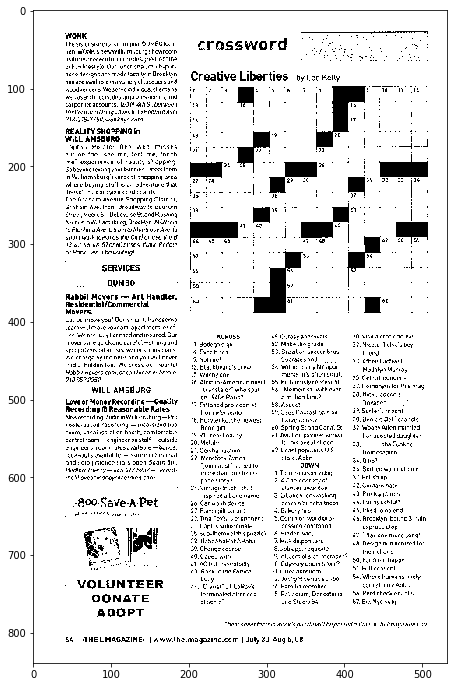

In [ ]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
show_pic(th1)

### 3.3.2 Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

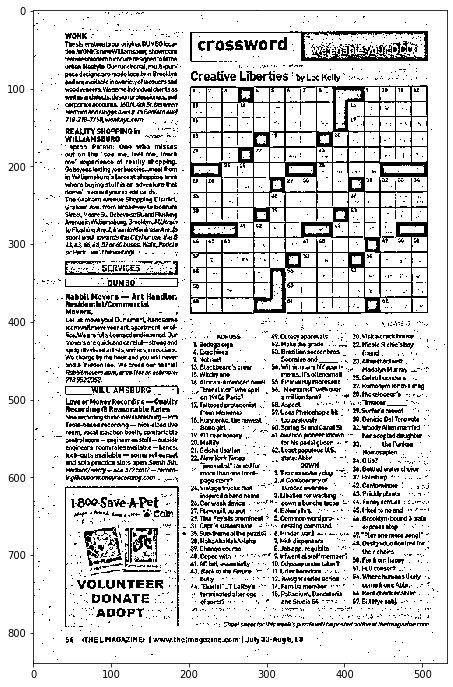

In [ ]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
show_pic(th2)

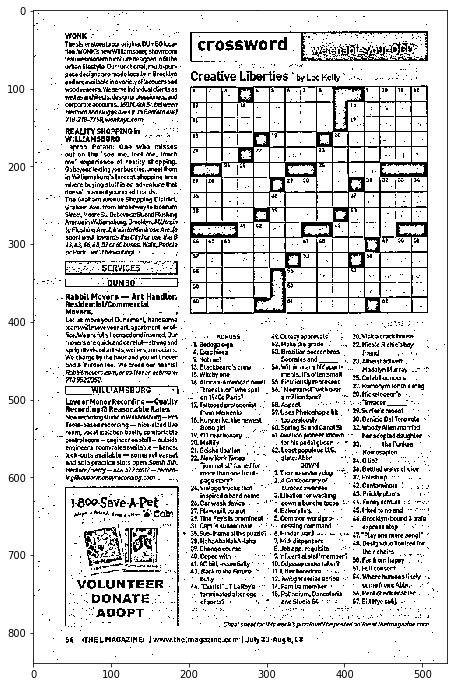

In [ ]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)
show_pic(th3)

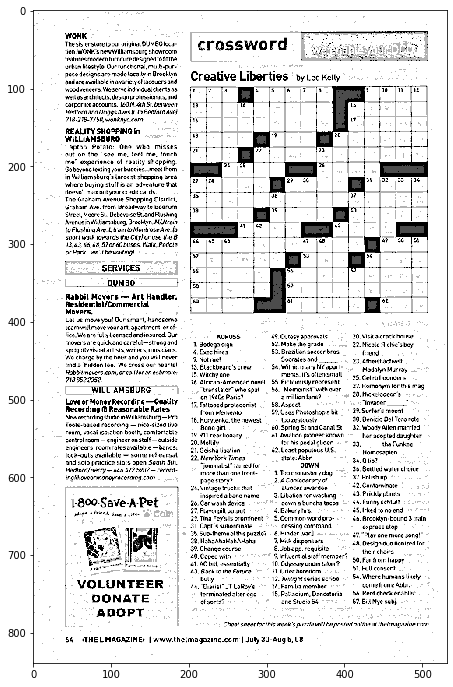

In [ ]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)

## 3.4 Blurring and Smoothing

### 3.4.1 Gamma Correction : Practical Effect of Increasing Brightness

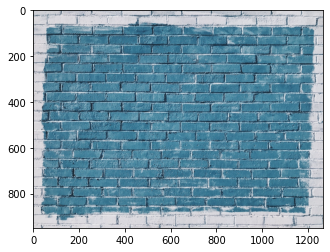

In [27]:
img = cv2.imread('./basic_cv/bricks.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

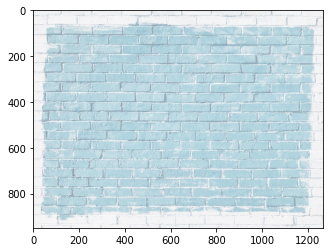

In [28]:
# smaller gamma --> lighter, more than 1 darker
img = cv2.imread('./basic_cv/bricks.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gamma = 1/4
effected_image = np.power(img, gamma)
plt.imshow(effected_image)

### 3.4.2 Low Pass Filter with a 2D Convolution

A fitlering operation known as 2D convolution can be used to create a low-pass filter.

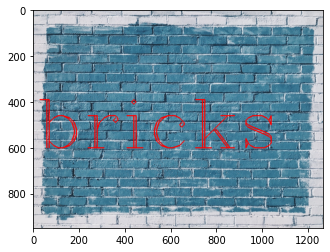

In [29]:
img = cv2.imread('./basic_cv/bricks.jpg').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img,text='bricks',org=(10,600), fontFace=font,fontScale= 10,color=(255,0,0),thickness=4)
plt.imshow(img)

In [ ]:
# creating kernel
kernel = np.ones(shape=(5,5),dtype=np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


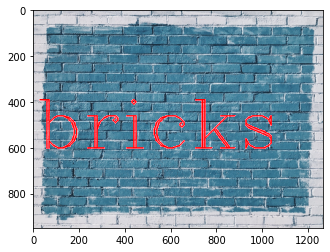

In [ ]:
dst = cv2.filter2D(img,-1,kernel)
plt.imshow(dst)

### 3.4.2 Averaging

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


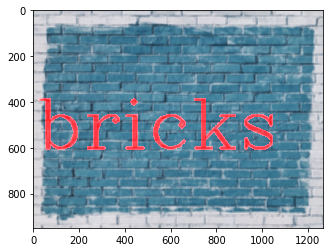

In [ ]:
blurred_img = cv2.blur(img,ksize=(10,10))
plt.imshow(blurred_img)

### 3.4.3 Gaussian Blurring

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


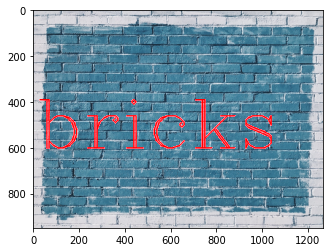

In [ ]:
blurred_img = cv2.GaussianBlur(img,(5,5),10)
plt.imshow(blurred_img)

### 3.4.4 Median Blurring

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


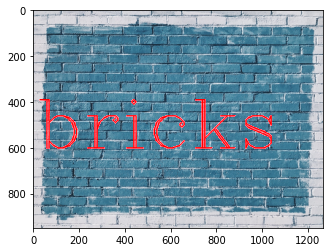

In [ ]:
median = cv2.medianBlur(img,5)
plt.imshow(blurred_img)

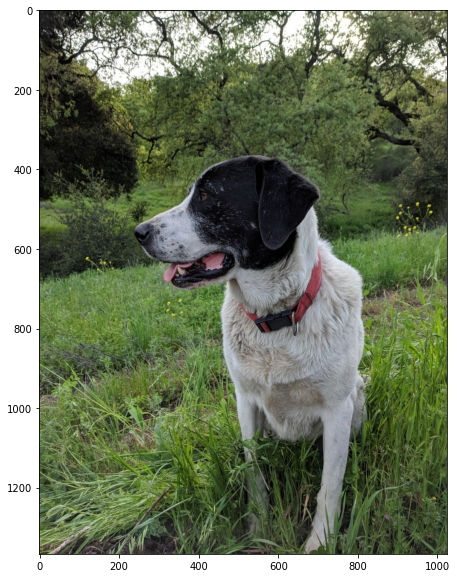

In [30]:
dog_img = cv2.imread('./basic_cv/sammy.jpg')
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (12,10))
plt.imshow(dog_img)

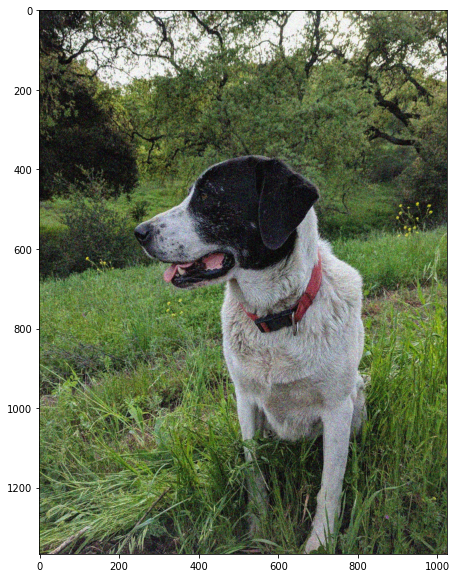

In [31]:
noise_img = cv2.imread('./basic_cv/sammy_noise.jpg')
plt.figure(figsize = (12,10))
plt.imshow(noise_img)

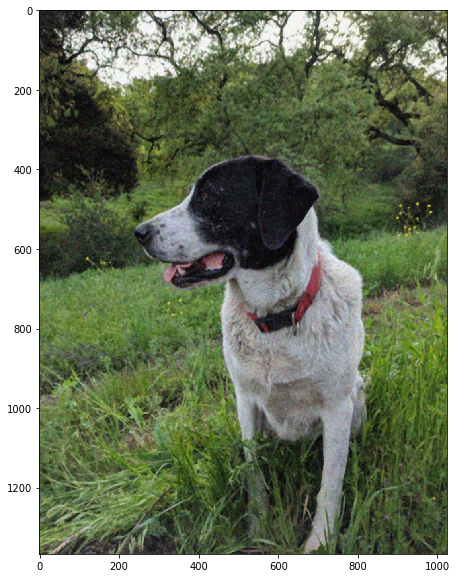

In [ ]:
# Use median blur to remove noise
median_img = cv2.medianBlur(noise_img,5)
plt.figure(figsize = (12,10))
plt.imshow(median_img)

### 3.4.5 Bilateral Filtering
To remove unwanted noise and keep edges sharp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


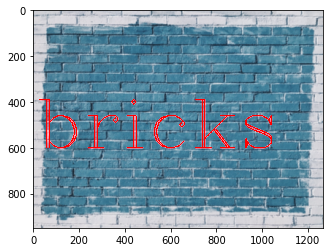

In [ ]:
blurred_img = cv2.bilateralFilter(img,9,75,75)
plt.imshow(blurred_img)

## 3.5 Gradients

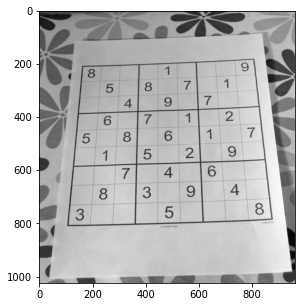

In [34]:
def display_img(img):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

img = cv2.imread('./basic_cv/sudoku.jpg',0)
display_img(img)

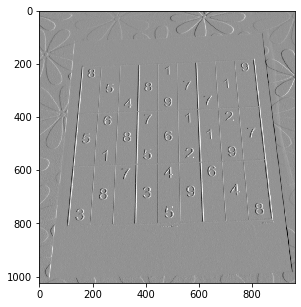

In [ ]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# CAN ONLY SEE X DIRECTION
display_img(sobelx)

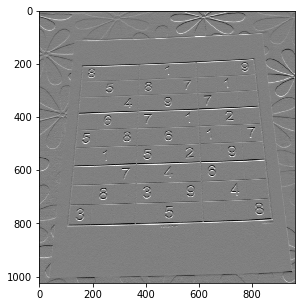

In [ ]:
display_img(sobely)

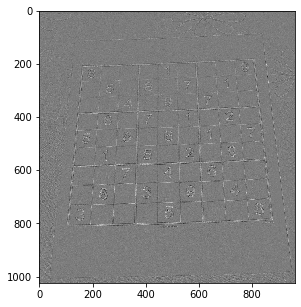

In [ ]:
display_img(laplacian)

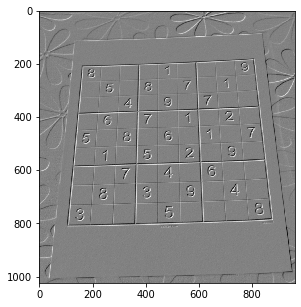

In [ ]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
display_img(blended)

### 3.5.1 Morphological Operators

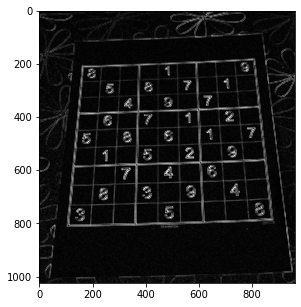

In [ ]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

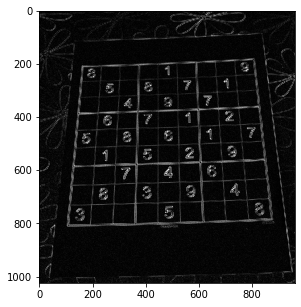

In [ ]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

### 3.5.2 Threshold

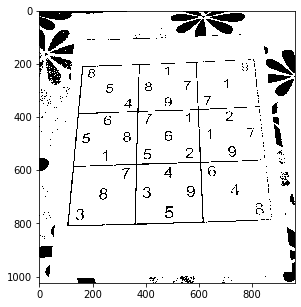

In [ ]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

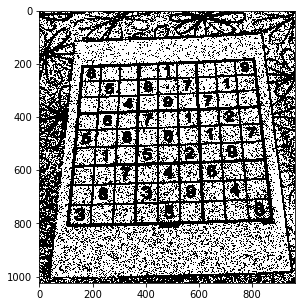

In [ ]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

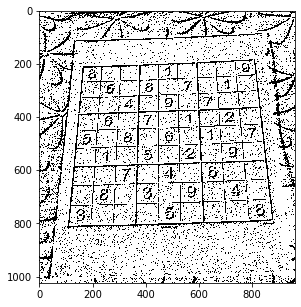

In [ ]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)

## 3.6 Histrogram
Check out the video for full details, but here is also a great write-up: http://www.cambridgeincolour.com/tutorials/histograms1.htm

### 3.6.1 Calculation of Histrogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [35]:
dark_horse = cv2.imread('./basic_cv/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('./basic_cv/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('./basic_cv/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

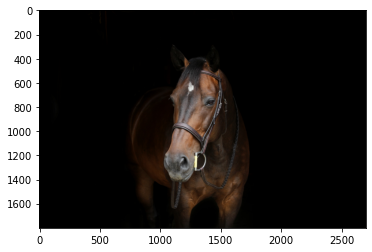

In [36]:
plt.imshow(show_horse)

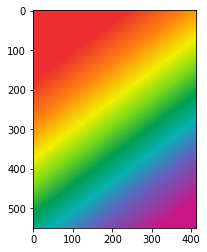

In [ ]:
plt.imshow(show_rainbow)

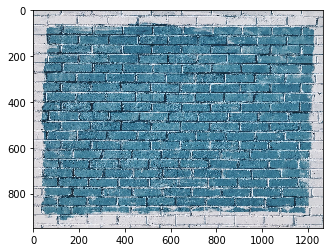

In [ ]:
plt.imshow(show_bricks)

(256, 1)


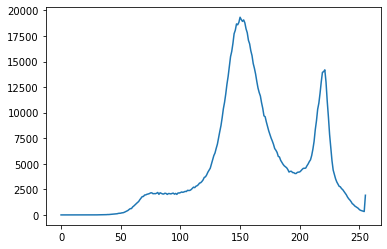

In [ ]:
# test blue color
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
print(hist_values.shape)
plt.plot(hist_values)

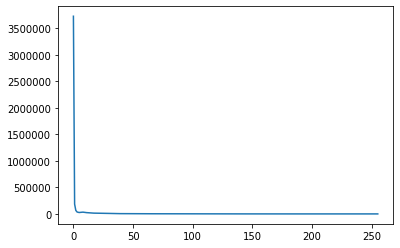

In [ ]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
# dark horse has very little blue, lot of zero as it is black!
plt.plot(hist_values)

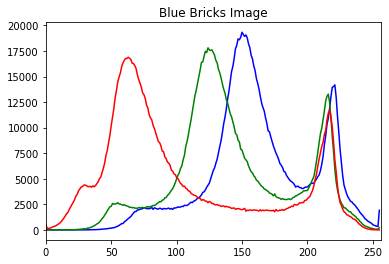

In [ ]:
# 3 colours histrogram
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

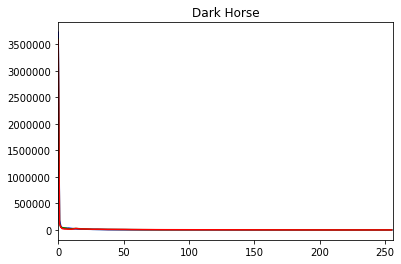

In [ ]:
# 3 colours histrogram
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse')
plt.show()

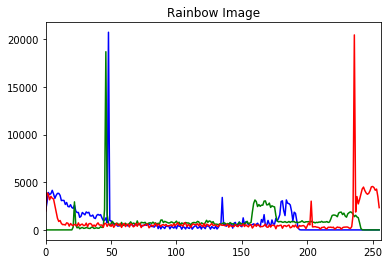

In [ ]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### 3.6.2 Histogram Equalization

https://en.wikipedia.org/wiki/Histogram_equalization

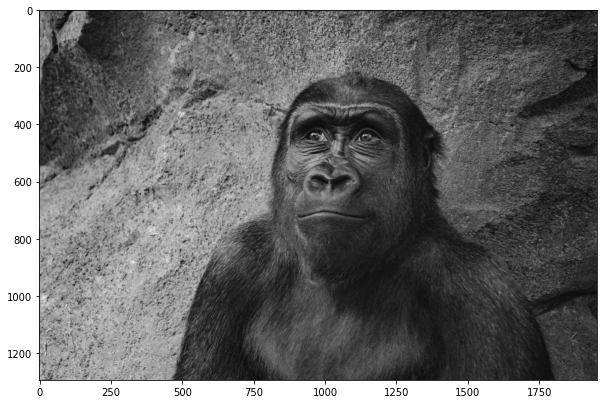

In [37]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

gorilla = cv2.imread('./basic_cv/gorilla.jpg',0)
display(gorilla,cmap='gray')

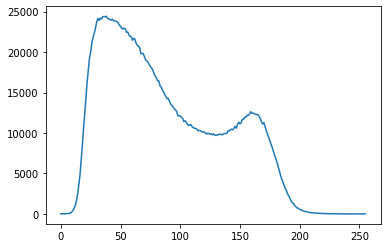

In [ ]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

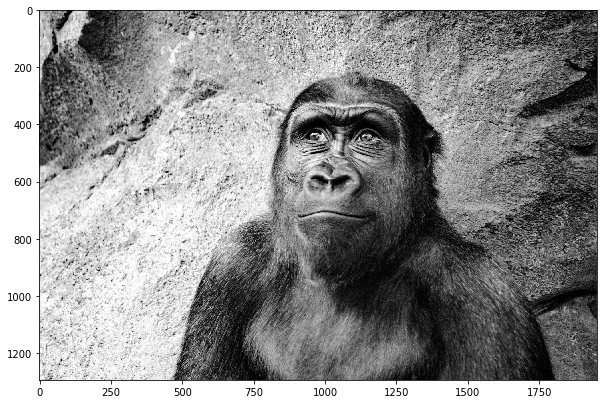

In [ ]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,cmap='gray')

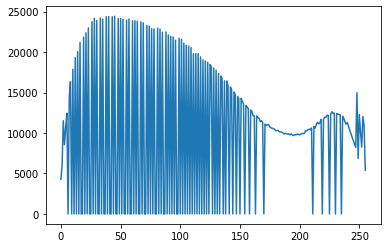

In [ ]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

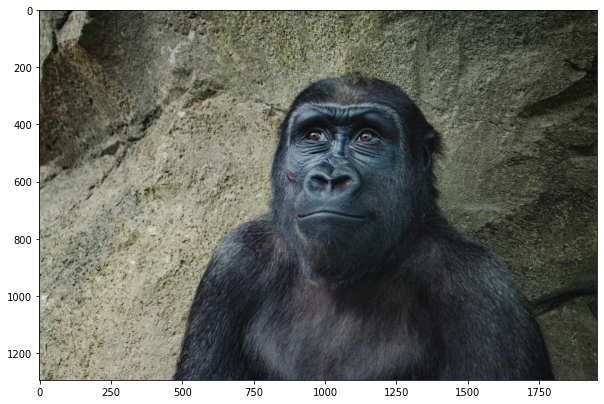

In [38]:
# color image
color_gorilla = cv2.imread('./basic_cv/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
display(show_gorilla)

In [ ]:
# Grab V channel
# 0 is hue, 1 is saturation, 2 is color value
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [ ]:
# work with hsv
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

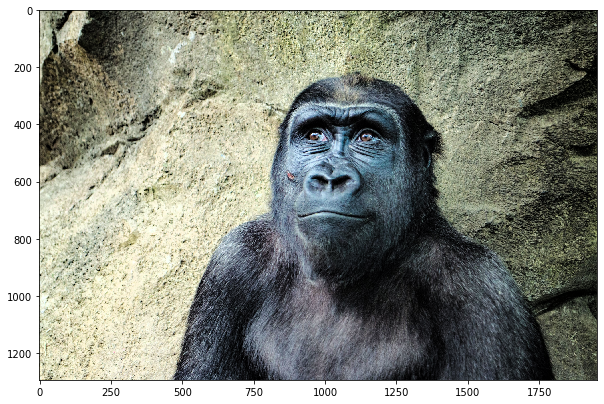

In [ ]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)